In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from stingray import Powerspectrum, Multitaper, Lightcurve, plot_dB
from scipy import signal

/home/dhruv/repos/stingray/stingray/largememory.py:25: UserWarning: Large Datasets may not be processed efficiently due to computational constraints
  warnings.warn(


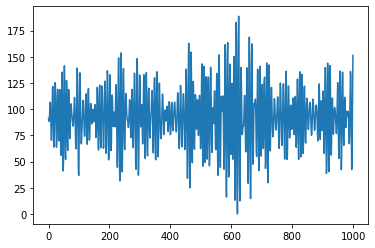

In [2]:
np.random.seed(100) # For consistency
coeff = np.array([2.7607, -3.8106, 2.6535, -0.9238])
ar4 = np.r_[1, -coeff] # For use with scipy.signal
N = 1000


freq, h = signal.freqz(b=1.0, a=ar4, worN=N, fs=1) #True PSD of AR(4)
psd = (h * h.conj()).real

psd = 10 * np.log10(psd)

data = signal.lfilter([1.0], ar4, np.random.randn(N)) # 1000 AR(4) data samples
data += abs(data.min()) # stingray.Powerspectrum does not accept negative values
times = np.arange(N)

lc2 = Lightcurve(time=times, counts=data)
lc2.plot()

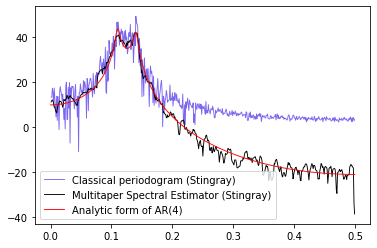

In [3]:
ps = Powerspectrum(lc2, norm='abs') # There is some discrepancy between normalizations 
mtp = Multitaper(lc2, norm='none', adaptive=True, Fs=1) # These norm params give the closest resemblance to paper

ps_dB = 10 * np.log10(ps.power)
mtp_dB = 10 * np.log10(mtp.power)

fig = plt.figure()
plt.plot(ps.freq, ps_dB, label='Classical periodogram (Stingray)', color='mediumslateblue', linewidth=.9)
plt.plot(mtp.freq, mtp_dB, label='Multitaper Spectral Estimator (Stingray)', color='black', linewidth=.9)
plt.plot(freq, psd, label='Analytic form of AR(4)', color='red', linewidth=.9)
leg = plt.legend()